<center>

## <font color='blue'>ASTR 21100</font>
<center>

### <font color='blue'>"Computational Techniques in Astrophysics"</font>
    
<center>
    
### <font color='blue'> Integrating trajectories in a gravitational field and $N$-body calculations</font>

<center>
    
### <font color='blue'> 36 points (+ 5 possible extra-credit points)</font>
    
    
<center>

### <font color='blue'> Due Thursday,  Jan 16, 10pm</font>



<p>
<center>
<a href="https://www.esa.int/Science_Exploration/Space_Science/Gaia/Galactic_crash_may_have_triggered_Solar_System_formation"><img width=600 src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/05/sagittarius_collisions_trigger_star_formation_in_milky_way/22031413-3-eng-GB/Sagittarius_collisions_trigger_star_formation_in_Milky_Way_pillars.jpg"></img></a>
</center>

<p>
<center>
<img width=500 src="https://vignette.wikia.nocookie.net/planetpedia/images/9/9a/Gliese_876_b.jpg/revision/latest/scale-to-width-down/2000?cb=20110512032028"></img>
<br>

In this assignment you will use the simple KD method for computing trajectory of a particle in a gravitational field to 

1. identify key difference in orbits in extended mass distributions and around point-mass (exercise 1) 
<br>
2. Calculate trajectory of the Sagittarius dwarf galaxy orbiting around the Milky Way over the past 4 billion years (exercise 2 OR 3). Comparing the orbit to the actual reconstructed orbit should allow you to draw a conclusion whether the orbit could be reproduced just with the disk potential or if it also requires an extended dark matter halo around the disk.<br> 

3. In exercise 3 you will implement and test your own $N$-body integrator. After this, you can choose to **do either exercise 4 or 5 or do both for extra-credit** (if you do both you will get 5 points extra credit, not 8, because a similar plotting code should be written in both and it can be reused for both exercises). If you cannot get your N-body integration code to work, one can be provided to you so that you can do exercise 4 or 6 (contact professor in this case). 

In the exercise 4 the task is to explore which planets in our Solar system could potentially be detectable by an alien observer if they can measure velocities of stars with the same accuracy our civilization can. In the exercise 5 you are asked will use your $N$-body integrator to model orbits of 2 planets detected in the [exoplanet system Gliese 876](https://planet.fandom.com/wiki/Gliese_876). This star has more than 2 planets, but the most massive two of these pull on the star causing its radial velocity (velocity along our line-of-sight) to oscillate with a distinct pattern. Your goal is to reproduce this pattern, thereby reproducing key figures (Figure 1 and Figure 2) in the paper by [Laughlin et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract).



Key imports

In [26]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# see message in Slack channel #general for how to make this import to work
#from codes.plotting import plot_prettier
#plot_prettier()

Values of various quantities and constants used in the code below. 

In [27]:
AU = 1.49598e+13 # 1 AU = average distance from the Earth to the Sun in centimeters (cm)
G = 6.67259e-08 # universal gravitational constant in cgs units 
msun = 1.9891e33 # mass of the Sun in grams
yr =  365.25 * 24 * 60 * 60 # 1 year in seconds
kpc = 3.08568e+21 # kiloparsec in cm


In [28]:
def time_stepping(x0, v0, t0, tend, dt, *args, acc_func=None):
    """
    Implements time stepping for a particle's motion in three dimensions.

    This function updates the position and velocity of a particle over a series of time steps from t0 to tend.
    The acceleration of the particle at each time step is obtained by calling the acc_func function.

    Parameters:
    x0 (array-like): Initial coordinates of the particle at time t0, format [x, y, z].
    v0 (array-like): Initial velocity components of the particle at time t0, format [vx, vy, vz].
    t0 (float): Initial time.
    tend (float): End time.
    dt (float): Time step for the update.
    args: tuple of parameters to be passed to the acc_func 
    acc_func (function): A function that takes the current position (x) and velocity (v)
                         and returns the acceleration components as an array [ax, ay, az].

    Returns:
    array: arrays of time [shape =(nsteps)], positions [shape=(nsteps,3)], velocities [shape=(nsteps,3)].
    """

    # initialize time and arrays to keep coordinate and velocity components
    t = t0
    x, v = np.array(x0), np.array(v0)

    # Initialize lists to store times, coordimates, and velocities along trajectory
    time, xt, vt = [np.copy(t)], [np.copy(x0)], [np.copy(v0)]

    # Time stepping loop
    while t < tend:
        # Calculate acceleration components using the provided function
        a = np.array(acc_func(x, *args))

        # Update velocity and position using the KD scheme
        v += a * dt
        x += v * dt
        

        # Update time
        t += dt

        # Append current state to the trajectory
        time.append(t)
        xt.append(np.copy(x))
        vt.append(np.copy(v))
        
    return np.array(time), np.array(xt), np.array(vt)

In [29]:
def plot_traj_xy_xz(xt, xlab1='$x$', ylab1='$y$', xlab2='$x$', ylab2='$z$', lw=0.5, 
                    xlims=[-1.1, 1.1], ylims=[-1.1, 1.1], xlims2=None, ylims2=None, figsize=(7,3)):
    '''
    Helper function to plot trajectory in the x-y and x-z projections using Matplotlib 
    
    Parameters: 
        xt - arrays of coordinates [shape (nsteps,3)] to plot
        lw - controls width of the plotted lines (must be >0)
    Returns: None
    '''
    fig, ax = plt.subplots(1, 2, figsize=figsize) # define sub-panels
    fig.subplots_adjust(wspace=0.4)

    ax[0].plot(xt[:,0], xt[:,1], lw=lw)
    ax[0].set_xlim(xlims) # set x, and y axes limits 
    ax[0].set_ylim(ylims)
    ax[0].set_ylabel(ylab1) # add labels to axes
    ax[0].set_xlabel(xlab1)

    ax[1].plot(xt[:,0], xt[:,2], lw=lw)
    if xlims2 is None: 
        ax[1].set_xlim(xlims) # set x, and y axes limits 
    else:
        ax[1].set_xlim(xlims2)
    if ylims2 is None: 
        ax[1].set_ylim(ylims) # set x, and y axes limits 
    else:
        ax[1].set_ylim(ylims2)

    ax[1].set_xlabel(xlab2)
    ax[1].set_ylabel(ylab2)
    plt.show()

Function computing acceleration components due to a point mass. 

In [30]:
def acc_point_mass(x, *args):
    """
    Computes acceleration from a point mass at the position with coordinates in x
    Parameters:
        x: array of size 3 with the coordinates of the point in cm
        args[0] must be the mass in grams 
    Returns:
        array of size 3 with the acceleration components in cm/s**2
    """
    m = args[0]
    r = np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
    return -G * m/r**3 * x


This code should be used for comparisons with results in the exercise 1. 

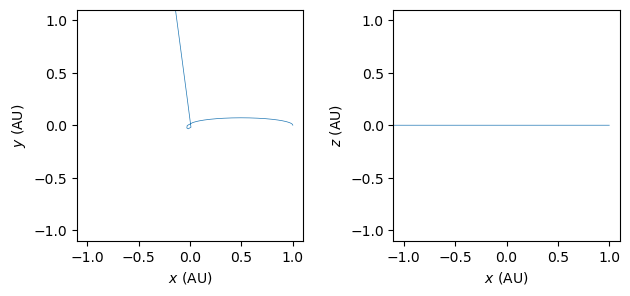

In [31]:
vcirc = (G*msun/AU)**0.5 # circular velocity = sqrt(G*Msun/AU)

# set initial position and velocity
x0 = [AU, 0., 0.] # coordinates of the "Earth"
v0 = [0., .1*vcirc, 0.] # initial velocity of the "Earth" 

t0 = 0.
tend = 10 * yr
dt = (tend - t0) / 10000. 

args = (msun,) # supply mass of the point-mass for acceleration function

t, xt, vt = time_stepping(x0, v0, t0, tend, dt, *args, acc_func=acc_point_mass)

t /= yr # convert time from seconds to years
xt /= AU # convert coordinates from cm to AU 

plot_traj_xy_xz(xt, xlab1=r'$x\rm\ (AU)$', ylab1=r'$y\rm\ (AU)$', 
                     xlab2=r'$x\rm\ (AU)$', ylab2=r'$z\rm\ (AU)$', lw=0.5)

## 1. Calculating trajectory in an extended mass distribution

### 4 points

#### Background info. 
The case of a gravitating point-mass considered in class on Thu, Jan 9 assumes that all of the gravitating mass is in a point, while the rest of space is empty. 
In astrophysics, we often encounter extended mass distribution. For example, stars, gas and dark matter is everywhere in our galaxy, although the overall density of matter is highest near the center of the galaxy and decreases with increasing distance to the center. 

At distances $>10$ kpc from the center matter density distribution can be apporixated quite well by the extended 
 [Navarro-Frenk-White profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile) (NFW). 
The profile assumes that mass distribution is spherically symmetric - that is density depends only on distance to the center $r$. 

Acceleration due to this NFW mass distribution at the location $\vec{r}$ is 
$$\vec{a} =-\frac{GM_{200}}{\ln(1+c) - c/(1+c)}\,\frac{\frac{r}{r+r_s}-\ln\left(1+\frac{r}{r_s}\right)}{r^3}\, \vec{r}
$$

where mass $M_{200}$ is the mass within the radius $R_{200}$, and $r_s$ is the scale radius that defines how concentrated the profile is via the concentration $c=R_{200}/r_s$. These quantities are parameters of the profile that are estimated using observational data. 

#### Tasks
In the code  below the parameters of the NFW mass distribution are similar to the mass distribution around our Milky Way galaxy.  The code sets up initial conditions for a particle on a circular orbit, runs the trajectory calculation, and plots the resulting trajectory in the $x-y$ and $x-z$ projections.

First run the code below as given to make sure that it works and you get a circular trajectory by examining the 2-panel plot of trajectory in the $x-y$ and $x-z$ projections. 
<br>

* **1a (2 points).** Change the $y$-component of the initial velocity from <tt>vcirc</tt> to <tt>0.7vcirc</tt>. Compare resulting trajectory to the trajectory with <tt>0.7vcirc</tt> initial velocity for the point-mass using the code above and identify the most salient difference. Discuss the difference and present a qualitative explanation for why the trajectory is so different in this case. 
<br>

* **1b (2 points).** Change the $y$-component of the initial velocity from to <tt>0.1vcirc</tt>. Compare resulting trajectory to the trajectory with <tt>0.1vcirc</tt> initial velocity for the point-mass using the code above. Discuss the main difference that you can see between this case and the corresponding orbit around the point mass. 

1a: 

The trajectory is so differennt because the velocity needed to maintain circular orbit is very specific, as it corresponds to the necessary centripetal acceleration to keep the particle in circular orbit (mv^2/r). Thus, due to its change, the particle now travels in a series of ellipse-like orbits that resemble a flower pattern, which is a more general form for the orbit of a gravitational body. 

2a: 
Now, after changing the velocity again, the particle now does not orbit at all, but rather goes off into space after completing one loop around the center of mass, maybe because it gains enough energy passing the center of mass to escape its gravitiational pull entirely. 

In [32]:
def acc_nfw(x, *args):
    '''Computes acceleration due to the NFW mass distribution at the distance x from the origin
    Parameters:
       x: arrays with 3 coordinates in the system where center of the NFW potential is at the origin
       args: a tuple of size 2 containing total mass M200 in units of Sun's mass and dimensionless concentration c
    Returns:
       numpy array with 3 components of the acceleration
    '''
    m200, c = args[0], args[1]
    r200 = 206.285 * (m200/1e12)**(1./3) # R200 in kpc
    rs = r200 / c * kpc
    r = np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)

    acc = G * m200 * msun / (np.log(1+c) - c/(1+c)) * (r/(r+rs) - np.log(1+r/rs))/r**3 * x
    return acc

In [33]:

def fnfw(x): 
    '''
    Helper function for computing mass within a radius r for the NFW profile
    '''
    assert(x >= 0)
    return np.log(1.+x) - x/(1+x)

def vcirc_nfw(r0=8, m200=9e11, c=10):
    '''
    Compute circular velocity for input distance r0, m200, and concentration c assuming NFW profile
    
    Returns: 
        circular velocity at r0 in cm/s
    '''
    r200 = 206.285 * (m200/1e12)**(1./3) # R200 in kpc
    
    r0 = r0 * kpc
    rs = r200 / c * kpc

    mr0 = m200 * fnfw(r0/rs) / fnfw(c)

    vcirc = (G*mr0*msun / r0)**0.5
    return vcirc

In [34]:
# set initial conditions
r0 = 8 
m200, c = 9e11, 10 # total mass of the Milky Way in Msun and halo concentration
args = (m200, c) 
vcirc_nfw = vcirc_nfw(r0=r0, m200=m200, c=c)

x0 = [r0*kpc, 0., 0.] # initial coordinates 
v0 = [0., vcirc_nfw, 0.] # initial velocity 

t0 = 0.
tend = 1e9 * yr # duration of calculation
dt = (tend - t0) / 10000. 


t, xt, vt = time_stepping(x0, v0, t0, tend, dt, *args, acc_func=acc_nfw)

t /= (1e6*yr)
xt /= kpc

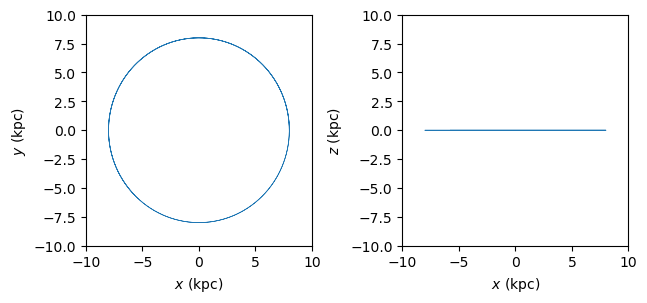

In [35]:
plot_traj_xy_xz(xt, xlab1=r'$x\rm\ (kpc)$', ylab1=r'$y\rm\ (kpc)$', 
                 xlab2=r'$x\rm\ (kpc)$', ylab2=r'$z\rm\ (kpc)$', 
                    xlims=[-10,10], ylims=[-10,10])


## 2. Modeling Sagittarius dwarf trajectory in the NFW + disk potential 

### 10 points

#### Background info: 

#### Background info

[Sagittarius dwarf galaxy](https://en.wikipedia.org/wiki/Sagittarius_Dwarf_Spheroidal_Galaxy) was discovered in 1994. Observational measurements showed that it has an orbit that loops around the center of our galaxy and passed near the plane of the Milky Way disk ($z=0$) a few times. In fact, one of these passages may have caused a perturbation in the diffuse gas in the Milky Way disk [and triggered formation of our Sun and solar system](https://www.esa.int/Science_Exploration/Space_Science/Gaia/Galactic_crash_may_have_triggered_Solar_System_formation). 

Modeling by [Thomas et al. 2017](https://www.aanda.org/articles/aa/full_html/2017/07/aa30531-17/aa30531-17.html) showed that a good match to the orbit of the Sagittarius galaxy over the past 4 billion years (astronomers use "gigayear" or Gyr for short to indicate billion years) can be obtained if the initial coordinates and velocity components of the Sagittarius in the coordinate system where Milky Way center is at the origin were 

* $x= -37.05$ kpc, $y=-24.18$ kpc, $z=51.34$ kpc, where kpc is kiloparsec (thousand parsecs) equal to $3.08568\times 10^{21}$ cm.  
<br>

* $v_x = -8.406\times 10^6$ cm/s, $2.760\times 10^6$ cm/s, $-6.441\times 10^6$ cm/s.

In the exercises above NFW spherically-symmetric distribution of mass was assumed. This neglects potential of the Milky Way disk. NFW mass distribution approximates mass distribution around the Milky Way galaxy at large distances, but at smaller distances ($r<10$ kpc) contribution of the disk, which is not spherically symmetric, can significantly alter trajectories. In this experiment, you will add the accelerations due to the gravity of stars and gas in the disk of the Milky Way using the  Miyamoto-Nagai model for the mass distribution in the disk that is characterized by the potential: 

$$\phi(R,z) = -\frac{GM_{\rm disk}}{\left[R^2 + (\sqrt{z^2 + b^2} + a)^2\right]^{1/2}},$$

where $R^2 = x^2+y^2$ assuming that the disk mid-plane is in the $x-y$ ($z=0$) plane, $a$ is parameter that characterizes size of the disk and $b$ is the parameter that characterizes thickness of the disk. 

Acceleration components due to mass distribution with this potential are
$$a_x = -\frac{\partial\phi}{\partial x} = -\frac{G M_{\text{disk}}}{\left(x^2 + y^2 + \left(a + \sqrt{b^2 + z^2}\right)^2\right)^{3/2}}\, x$$

$$a_y = -\frac{\partial\phi}{\partial y} = -\frac{G M_{\text{disk}}}{\left(x^2 + y^2 + \left(a + \sqrt{b^2 + z^2}\right)^2\right)^{3/2}}\,y$$

$$a_z = -\frac{\partial\phi}{\partial z} = -\frac{G M_{\text{disk}}}{\left(x^2 + y^2 + \left(a + \sqrt{b^2 + z^2}\right)^2\right)^{3/2}}\,\frac{ \left(a + \sqrt{b^2 + z^2}\right)}{\sqrt{b^2 + z^2} }\,z$$

And the circular velocity for a particle in the midplane of the disk ($z=0$) for this potential is  
$$V_{\rm circ, disk}\vert_{z=0} = \sqrt{R\frac{\partial\phi(R,z)}{\partial R}\vert_{z=0}}= \sqrt{\frac{G M_{\rm disk} R^2}{\left[R^2 + (a+b)^2\right]^{3/2}}}$$

Also read background info for exercise 2 above. 

#### Tasks

* **2a (2 points).** Implement a function calculating accelerations due to disk in cm/s using the expressions above. 
<br>

* **2b (1 point).** Implement a function calculating $v_{\rm circ, disk}$ in cm/s using the expression above. Be careful with coding expressions exactly as shown and check them after you implement the calculations against equations above. 
<br>

* **2c (1 point).** Implement another function that computes the sum of the accelerations due to the NFW mass distribution with parameters used in exercises 1 and 2 and accelerations due to the disk with parameters similar to that of the Milky Way disk: $M_{\rm disk}=7\times 10^{10}\ M_\odot$ (where $M_\odot=1.9891\times 10^{33}$ grams is the mass of the Sun) with $a=3$ kpc and $b=0.3$ kpc (where kpc is 1000 parsecs or ${\rm kpc}=3.08568\times 10^{21}$ cm as is set in the <tt>kpc</tt> at the beginning of this notebook. 
<br>

* **2d (2 points).** Test your acceleration function by setting particle at the initial coordinates $x=8$ kpc and $y=0$, $z=0$ and initial velocity components: $v_x=0$, $v_y=v_{\rm circ}$, $v_z=0$, where 
$$v_{\rm circ}=\sqrt{v_{\rm circ,NFW}^2(r=8{\,\rm kpc}) + v_{\rm circ, disk}^2(r=8{\,\rm kpc})}$$
where $v_{\rm circ,NFW}$ is the circular velocity calculated by function <tt>vcirc_nfw</tt> above and integrating for a billion years. Plot the trajectory of the particle resulting from your calculation in the $x-y$ and $x-z$ planes. The correct inegration for a billion years should result in a circular orbit in the $x-y$ plane while $z$ coordinate should remain $0$. 
<br>

* **2e (5 points).** Set up initial conditions for the Sagittarius dwarf as described in exercise 2.  Run the calculation of the trajectory for 4 gigaryears and plot the resulting trajectory in the $x-y$ and $x-z$ projections one time using only the disk contribution to the potential: $v_{\rm circ}=v_{\rm circ, disk}$, and the second time using both disk and NFW halo contributions: $v_{\rm circ}=\sqrt{v_{\rm circ,NFW}^2 + v_{\rm circ, disk}^2}$. Plot orbits of the Sagittarius dwarf galaxy in both cases. You will need to adjust limits of the plot to something like $[-75, 75]$ kpc using <tt>xlims</tt> and <tt>ylims</tt> arguments to the plotting function. 
<br>

* **2f (1 point).** Compare the trajectory you obtain in the $x-z$ projection to the trajectory in [Figure 2](https://www.aanda.org/articles/aa/full_html/2017/07/aa30531-17/F2.html) of the Thomas et al. 2017 paper, which is the trajectory that matches the distribution of observed stars associated with this galaxy. The trajectory you should obtain in one of the calculations in 2e should be similar, but will not be exactly the same because the extended NFW mass distribution differs from what was used in that paper. 

Briefly discuss which case (with our without dark matter halo) results in orbit closer to the real orbit of the Sagittarius galaxy. 

This exercise is an example of how computer modeling is used to learn about properties of galaxies, such as mass distribution around them. 



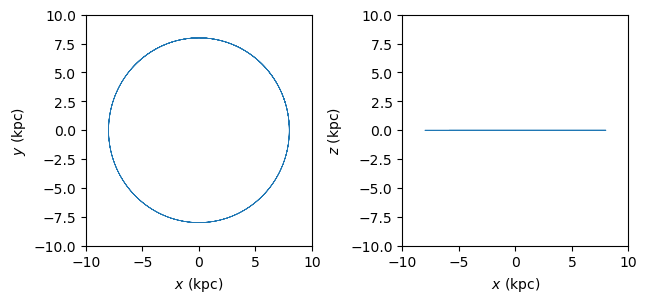

In [36]:
def acc_disc(x, *args):
    x1 = x[0] 
    y1 = x[1]
    z1 = x[2]
    a = args[0]
    b = args[1]
    M = args[2]
    a_x = -(G*M*x1)/((x1**2+y1**2+(a+(b**2+z1**2)**(1/2))**2)**(3/2))
    a_y = -(G*M*y1)/((x1**2+y1**2+(a+(b**2+z1**2)**(1/2))**2)**(3/2))
    a_z = -((G*M*z1)*(a+(b**2+z1**2)**(1/2)))/(((x1**2+y1**2+(a+(b**2+z1**2)**(1/2))**2)**(3/2))*((b**2+z1**2)**(1/2)))
    return a_x, a_y, a_z


    
def v_circ(x, a, b, M):
    R = (x[0]**2+x[1]**2)**(1/2)
    v_circ = ((G*M*(R**2))/((R**2+((a+b)**2))**(3/2)))**(1/2)
    return v_circ

def add_acc(x, a, b, M):
    a_x, a_y, a_z = acc_nfw(x, m200, c)
    a_x1, a_y1, a_z1 =  acc_disc(x, a, b, M)
    a_xtot = a_x + a_x1
    a_ytot = a_y + a_y1
    a_ztot = a_z + a_z1
    return a_xtot, a_ytot, a_ztot

x = [8.0*kpc, 0.0 ,0.0]

x = np.array(x)
v_circ = ((v_circ(x, 3*kpc, .3*kpc, 7*(10**10)*msun)**2+ vcirc_nfw**2))**(1/2)
v_circ = float(v_circ)
v0 = [0.0, v_circ, 0.0]
v = np.array(v0)

t0 = 0
dt = 10000*yr
tend = 1000000000*yr
args = [3*kpc, .3*kpc, 7*(10**10)*msun]
args = np.array(args)
m = 7*(10**10)*msun

t, xt, vt = time_stepping(x, v, t0, tend, dt, *args, acc_func = add_acc)

xt/=kpc

plot_traj_xy_xz(xt, xlab1=r'$x\rm\ (kpc)$', ylab1=r'$y\rm\ (kpc)$', 
                 xlab2=r'$x\rm\ (kpc)$', ylab2=r'$z\rm\ (kpc)$', 
                    xlims=[-10,10], ylims=[-10,10])

#the trajectory is indeed circular

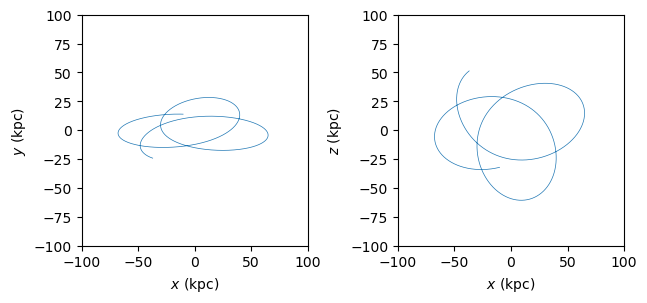

In [37]:
#now run our array 
#𝑥=−37.05  kpc, 𝑦=−24.18 kpc, 𝑧=51.34 kpc
#𝑣𝑥=−8.406×106  cm/s,  2.760×106  cm/s,  −6.441×106  cm/s.

x1 = [-37.05*kpc, -24.18*kpc, 51.34*kpc]
x1 = np.array(x1)
v1 = [-8.406e6, 2.76e6, -6.441e6]
v1 = np.array(v1)

t, xt, vt = time_stepping(x1, v1, t0, 4*tend, 4*dt, *args, acc_func = add_acc)

xt = xt / kpc


plot_traj_xy_xz(xt, xlab1=r'$x\rm\ (kpc)$', ylab1=r'$y\rm\ (kpc)$', 
                 xlab2=r'$x\rm\ (kpc)$', ylab2=r'$z\rm\ (kpc)$', 
                    xlims=[-100,100], ylims=[-100,100])



2f: The graph produced, while not exactly identically, is very similar to the expected graph for sagittarius. It has the same flower patern, made of elipse-like petals, and both have two complete petals after the alloted time of integration. They also both have a similar tilt, with the bottom petal not being exactly vertical. 

### <font color='darkblue'>3  (14 points).  Implementing code for $N$-body integration

**3a (12 points).** Implement a function that carries out integrations of $N$-body dynamics of $N$ particles using the Kick-Drift (KD) update scheme. The function should take as input  initial coordinates and velocities of $N$ particles and evolves them forward using a specified constant time step for some input number of steps. You can use cgs unit system and examples provided in the distributed notebooks.
    
This function should also take as input the name of a function that computes accelerations for every particle using coordinates. This function should be called inside the $N$-body code to compute accelerations at each step. 
    
Here is a suggested format for the function inputs and outpus (you can choose your own). 
    
    def nbody_integrate(x, v, mp, dt=None, nsteps=None, acc_func=None):
        """
        integrate equations of motions starting from the input vectors x, v, mp
        for nsteps with constant time step dt
        
        Parameters: 
        ------------
        
        x, v- NumPy vectors of floats of shape (N,3) containing
             coordinates and velocities of N particles 
        mp - NumPy vector of masses of particles of length N
        dt - float
            step size
        acc_func  - python function
            name of a user-supplied function to compute mutual accelerations of particles
            and/or accelerations from an external potential
        
        Returns:
        -----------------
        tt - numpy float vector
            recorded orbit times
        xt, vt - numpy float vectors
            coordinates, velocities at times tt 
         

    """
    
 
**3b. (2 points)** Test your function by integrating a two body system with the Sun and the Earth with their true masses (see code snippet below) positions and velocities. The code below shows how to select solar masses, cartesian coordinates, and velocities of the Sun and major planets (and Pluto). These are their actual values at midnight on Nov 20, 2014 and were obtained from the [NASA's Horizon service](http://ssd.jpl.nasa.gov/horizons.cgi). The coordinate system is such that the plane of the solar system has $z=0$.    
    
***Hint:*** write your code in such a way that it is easy to change the Earth to any other planet in the solar system, if you plan to do exercise 4. 
    
Specifically, 1) plot the distance of the Earth from the Sun and make sure that on average it does not increase or decrease systematically but only changes oscillatorily during each orbital period; 2) compute the smallest and largest distances $r_{\rm min}$ and $r_{\rm max}$ from the Earth to the Sun using the array of distances. This is straigtforward if the distances are in a NumPy array and you can use min and max methods of the arrays: <tt>r.min()</tt> and <tt>r.max()</tt>. Compute the eccentricity of the Earth orbit (eccentricity is 0 for the circular orbit and is 1 for a straight line orbit):

$$e = \frac{1-r_{\rm min}/r_{\rm max}}{1+r_{\rm min}/r_{\rm max}}$$

Print out $r_{\rm min}/r_{\rm max}$ and $e$ that you obtain. Note that the Earth orbit is pretty close to circular, but is not exactly circular. If you integrate correctly and use sufficiently small step size, you should obtain $e\approx 0.017$.


[[ 7.97789026e+12  4.03988601e+10]
 [ 7.95225489e+12  4.04062603e+10]
 [ 7.92658699e+12  4.04136606e+10]
 ...
 [-7.17708694e+12  1.13644546e+11]
 [-7.20343831e+12  1.13651948e+11]
 [-7.22975921e+12  1.13659350e+11]]
r_min = 0.9829484677066319
r_max = 1.0173154292956534
eccentricity = 0.017181213759107437


'\nthis eccentricity is very similar to \nthe expected eccentricity of the path of the earth, so our \nprogram seems to be working properly!\n'

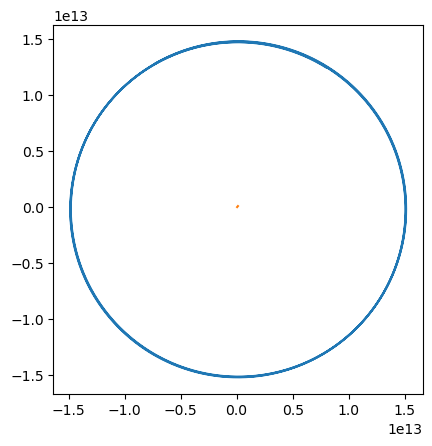

In [38]:
fig, ax = plt.subplots()
def acc_nbody(x, mp):
    #first split up 3xn array into 3 1xn arrays 
    '''This funcrion takes in x, a 3xN array, 
    and mp, a 1xN array and outputs the acceleration in each direction,
    each of which are a 1xN array'''
    xt = x[0]
    yt = x[1]
    zt = x[2] 
    #now we need to loop through to calculate gravities: 
    ax = np.zeros(shape = (len(xt)))
    ay = np.zeros(shape = (len(xt)))
    az = np.zeros(shape = (len(xt)))
    for i in range(0, len(xt)):
        for j in range(0, len(xt)): 
            if i == j:
                j+=1
            else: 
                r12 = ((xt[i]-xt[j])**2 + (yt[i]-yt[j])**2 + (zt[i]-zt[j])**2)**0.5
                ax1 = ((G*mp[j])/(r12**3)) * (xt[j]-xt[i])
                ay1 = ((G*mp[j])/(r12**3)) * (yt[j]-yt[i])
                az1 = ((G*mp[j])/(r12**3)) * (zt[j]-zt[i])
                ax[i] += ax1
                ay[i] += ay1
                az[i] += az1
    return ax, ay, az
            
x = [[.535*AU,.0027*AU],[.8312*AU,-.0011*AU],[-1.6211*10**-6*AU,-1.33*10**(-4)*AU]]

x = np.array(x)


mp = np.array([3.0404*10**(-6)*msun,msun])

        
    



def nbody_integrate(x, v, mp, dt=None, nsteps = None, acc_fun=None): 
    '''This function takes in 3xN arrays x and v, and 1xN array mp
    and outputs 6 nsteps by N arrays correesponding to the position and 
    velocity of each particle over time'''
    x1t = np.zeros(shape=(nsteps, len(mp)))
    y1t = np.zeros(shape=(nsteps, len(mp)))
    z1t = np.zeros(shape=(nsteps, len(mp)))
    vx1t = np.zeros(shape=(nsteps, len(mp)))
    vy1t = np.zeros(shape=(nsteps, len(mp)))
    vz1t = np.zeros(shape=(nsteps, len(mp)))
    t = np.zeros(nsteps)
    time = 0
    for i in range(0, nsteps):
        for j in range(0, len(mp)): 
            ax1, ay1, az1 = acc_nbody(x, mp)
            v[0,j] += ax1[j] *dt
            v[1,j] += ay1[j] *dt
            v[2,j] += az1[j] *dt
            x[0,j] += v[0, j] *dt
            x[1,j] += v[1, j] *dt
            x[2,j] += v[2, j] *dt
            x1t[i,j] += x[0, j] 
            y1t[i,j] += x[1, j]
            z1t[i,j] += x[2, j]
            vx1t[i,j] += v[0, j]
            vy1t[i,j] += v[1, j]
            vz1t[i,j] += v[2, j]
        t[i] += time
        time += dt
    return x1t, y1t, z1t, vx1t, vy1t, vz1t, t

v = [[-25.57*10**5,.0074*10**5],
     [15.9687*10**5,0.0086*10**5],
     [-1.7229*10**2,-17.586]]
v = np.array(v)

x1t, y1t, z1t, vx1t, vy1t, vz1t, t = nbody_integrate(x, v, mp, 10000, 10000)

print(x1t)
plt.plot(x1t[:,0], y1t[:,0])
plt.plot(x1t[:,1], y1t[:,1])
ax.set_aspect('equal')
        
#now we just need to create an r array to figure out the min and max to calculate eccentricity

r = ((x1t[:,0]-x1t[:,1])**2+(y1t[:,0]-y1t[:,1])**2+(z1t[:,0]-z1t[:,1])**2)**.5

r = r/ AU

max = r.max()
min = r.min()

e = (max-min)/(max+min)

print(f'r_min = {min}')
print(f'r_max = {max}')
print(f'eccentricity = {e}')

'''
this eccentricity is very similar to 
the expected eccentricity of the path of the earth, so our 
program seems to be working properly!
'''

#### Additional info and hints: 
The evolution code should consist of a loop stepping in time.
For each particle acceleration is computed by direct summation of forces from all other particles and use it to advance positions of particles. Thus, to compute acceleration for all particles one has to have two loops over particles (which is why computational time (complexity) of this calculation scales as $O(N^2)$). 

**Note:** The second loop during calculation of accelerations can be done via NumPy operation without an explicit loop straightforwardly using <tt>np.sum</tt>. It is less straightforward, but both loops in computation of accelerations for all $N$ particles can be removed using NumPy operations. I encourage you to try getting rid of the second or both loops in the computation of accelerations using NumPy operations. In other words, it is possible to compute all accelerations for all $N$ particles without loops using NumPy at the beginning of each step. It is also possible to do all of the coordinate and velocity updates without a loop over the number of particles using NumPy so that only the outer loop over the number of steps is present (this loop cannot be removed because subsequent steps depend on the previous steps and updates cannot be done in parallel. I recommend attempting doing optimizations with NumPy after you get code working with a function computing accelerations using loops or whatever form of code that you are most comfortable with.  

**Note:** Use of Python classes is useful for this problem. If you feel comfortable with using classes you are encouraged you to try their use for this problem. This is a good opportunity to practice class programming. If you want to go this route, we'll be happy to provide guidance and give pointers.  



In [39]:
AU = 1.49598e+13 # 1 AU = average distance from the Earth to the Sun in centimeters (cm)
G = 6.67259e-08 # universal gravitational constant in cgs units 
yr =  3.15569e+07 # 1 year in seconds


In [40]:
def read_solsys_bodies(plist = []):
    """
    Read solar system planets in the input list plist, in which these names are expected
    as strings: 'Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 
                'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto' 
    Parameters: 
        plist: list of strings with the names of solar system bodies in the list above
    Returns:
        nested dictionary, containing mass (in g), x, y, z (in cm), vx, vy, vz (in cm/s)
        for each name in the input plist 
    """
    index_dict = {'Sun': 9, 'Mercury': 0, 'Venus': 1, 'Earth': 2, 'Mars': 3, 
                  'Jupiter': 4, 'Saturn': 5, 'Uranus': 6, 'Neptune': 7, 'Pluto': 8}
    
    data_file = 'https://astro.uchicago.edu/~andrey/classes/a211/data/planets.dat'
    # read planet names into array name
    name = np.loadtxt(data_file, usecols=[0], unpack=True, dtype=str)
    # read planet initial positions and velocities
    mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_file, usecols=(1,2,3,4,5,6,7), unpack=True)

    AU = 1.49598e+13 # average distance of the Earth to the Sun in cm
    msun = 1.9891e33 # mass of the Sun in grams
    aupd = AU / (24*3600.) # AU/day for velocity unit conversion
    
    out_dict = {}
    for name in plist:
        assert(name in index_dict) # check if input name is legit
        ip = index_dict[name]
        out_dict[name] = {'mass': mp[ip]*msun, 'x': xp[ip]*AU, 'y': yp[ip]*AU, 'z': zp[ip]*AU,
                          'vx':  vxp[ip]*aupd, 'vy': vyp[ip]*aupd, 'vz': vzp[ip]*aupd}

    return out_dict

Example of how to read mass and initial coordinate and velocity components of the Sun and planet(s). The possible input names to the function `read_solsys_bodies` are: `'Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'`

In [41]:
# this will extract initial conditions for the Sun, Mercury and Earth
out = read_solsys_bodies(plist = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'])

# to select just Sun and Earth use: 
# plist = ['Sun', 'Earth']

# return out is a nested dictionary. For example, we can extract the mass (in g)
# initial x, y, z (in cm) and vx, vy, vz (in cm/s) for the Earth like this: 
m = out['Earth']['mass']
mmsun = m / out['Sun']['mass'] # in units of Msun)
x, y, z = out['Sun']['x'], out['Sun']['y'], out['Sun']['z']
vx, vy, vz = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz']

print('Mass, initial position and velocity of the Earth:')
print(f'm = {m:.4e} g = {mmsun:.4e} Msun')
print(f'x, y, z = {x/AU:.4f}, {y/AU:.4f}, {z/AU:.4e} AU ')
print(f'vx, vy, vz = {vx/1e5:.4f}, {vy/1e5:.4f}, {vz/1e5:.4e} km/s ')

Mass, initial position and velocity of the Earth:
m = 6.0477e+27 g = 3.0404e-06 Msun
x, y, z = 0.0027, -0.0011, -1.3306e-04 AU 
vx, vy, vz = 0.0074, 0.0086, -1.7586e-04 km/s 


### <font color='blue'>4. (8 points) Which planets of the Solar system would be detectable if we observed them around another star?</font>

#### Background: 
The first planets around other stars (called exoplanets in astronomy) were detected by the gravitational pull they exert on the star they orbit. As in any two-body system the star orbits the center of mass along the line connecting the star and a planet. If the planet is sufficiently massive, the motion of the star can be detected using spectal lines in its spectrum and the [Doppler shift effect](https://en.wikipedia.org/wiki/Doppler_effect). If more than one planet exerts a significant pull on the star, these multiple pulls will be reflected in an oscillatory change of velocity over time where multiple oscillation frequences are present. Velocity measurements over multiple periods can be used to map out such cyclical motion of the star and these measurements can be used to deduce information about planets orbiting the star. 

This method is still one of the main two methods of detecting signatures of exoplanets, but it has a limitation because with current technology we can only detect velocity changes of about 1 meter per second and larger. Hence small and distant planet are difficult or impossible to detect with this technique. Here you will explore which planets in the solar system would be detectable to a distant alien observer if their civilization is similar to ours and they can measure velocities with the same accuracy. 

#### Tasks: 

**4a. (3 points)** Implement a function to plot $x$ or $y$ component of the Sun's velocity (in units of meters/sec) as a function of time (in years) using Sun's trajectory resulting from your calculation of the Earth-Sun system. This corresponds to a possible "line-of-sight" velocity that could be measured by distant observer if they recorded the high-resolution spectrum of the Sun. Oscillations of this velocity induced by a planet could potentially be measured if observer was measuring velocities with the accuracy of about 1 meter/second afforded by our current technology. Calculate the evolution of the Earth-Sun system for at least 10 orbital periods of the Earth. Plot the velocity component  as a function of time using your calculation with the mean velocity over this interval subtracted. Discuss whether we could detect the Earth if we observed our Solar system around another star with the velocity measurement accuracy of 1 m/s based on your plot. 
    
**4b. (3 points)** Repeat the calculation and plot the $x$ or $y$ components of Sun's velocity (with the mean subtracted) in calculations where you substitute the Earth by Mercury, Venus, Mars, Jupiter, Saturn, Neptune, Uranus integrating evolution for 10 orbital periods in each case, where orbital period for each planet can be estimated using the third Kepler's law: 
$$P = \frac{2\pi}{\sqrt{G(M_\odot+m_{\rm planet})}}\,a^{3/2},$$
where $a$ is the semi-major axis of the planet's orbit (you can approximate it with the initial distance between the planet and the Sun).
Discuss whether any of these planets would be detectable around another star with our current technology. 

***Hint:*** rather than duplicating code for every planet, implement a function that makes the plot for a given planet, and then call this function in a loop over planets to automate the analysis.  
    
**4c. (2 points)** Select the planets that could induce detectable velocity changes and calculate evolution of the system of the Sun with all of these planets simultaneously (i.e. $N>2$ problem instead of $N=2$). Plot the component of Sun's velocity as a function of time at least for a 100 years (with the mean velocity over this period subtracted) and discuss the differences from the $v(t)$ plot in 2b when you calculated evolution of the Sun with a single planet. There should be visible differences resulting from the combined effects of the planets. 

### your solution: 

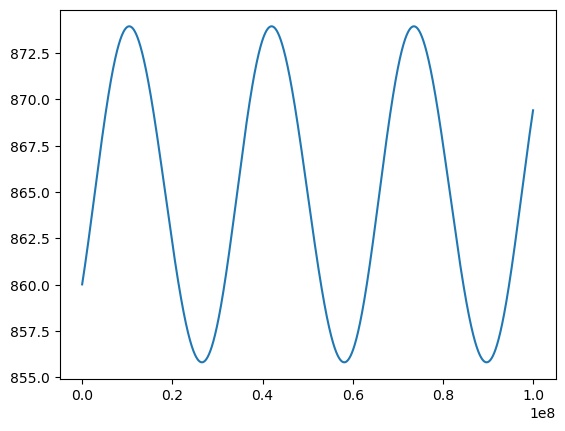

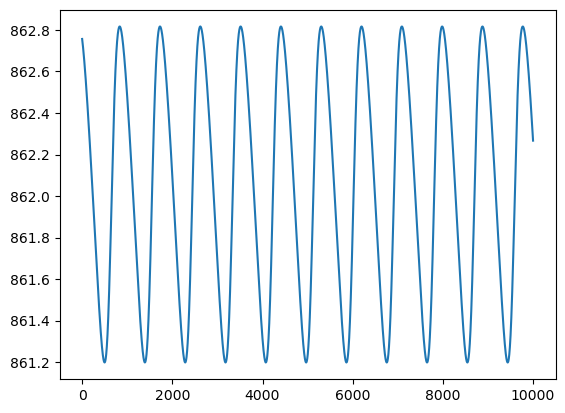

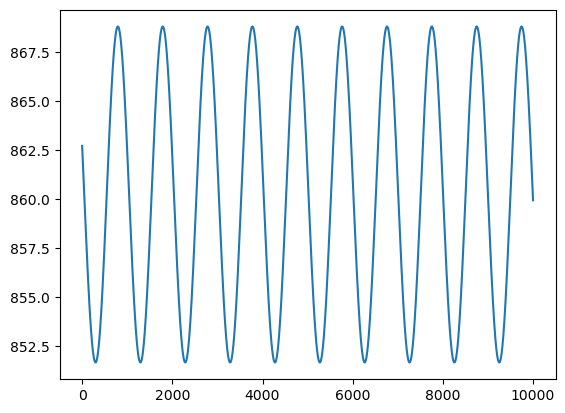

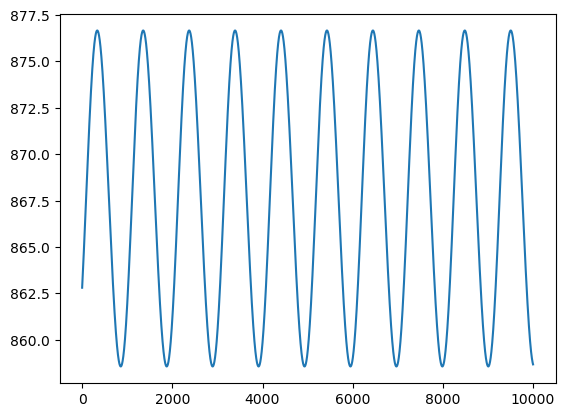

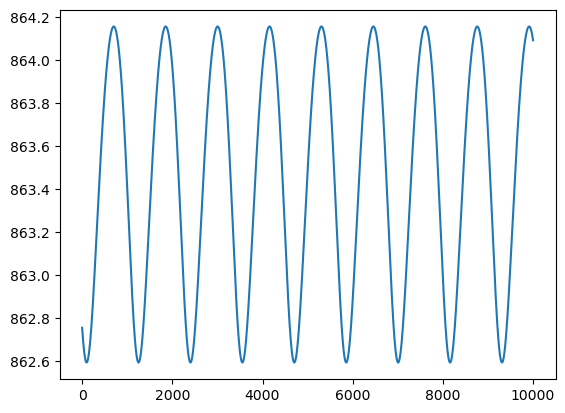

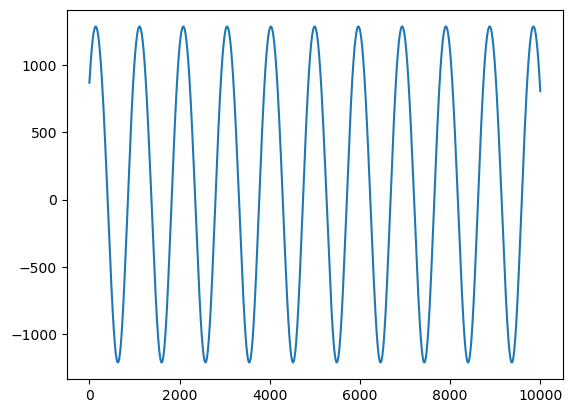

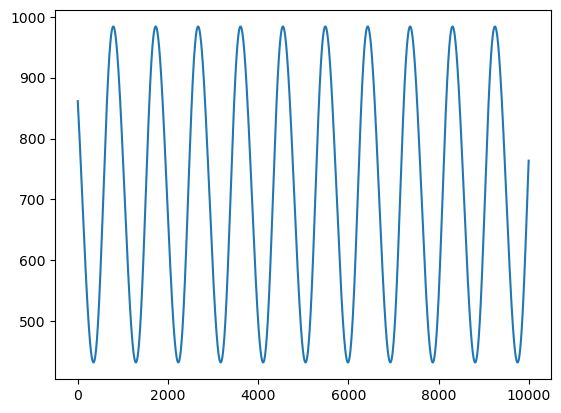

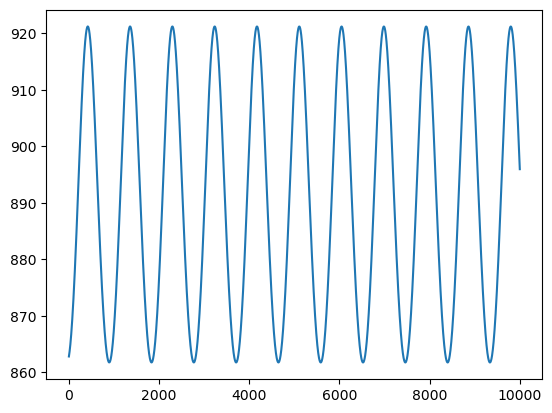

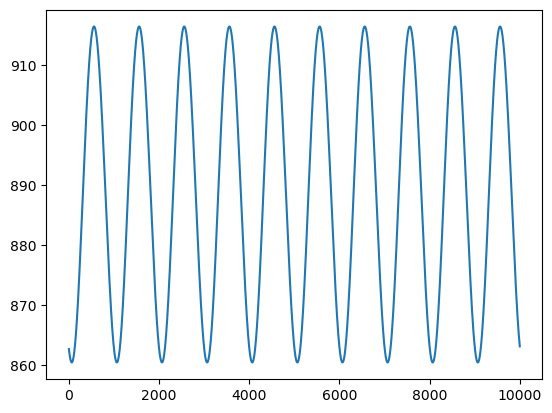

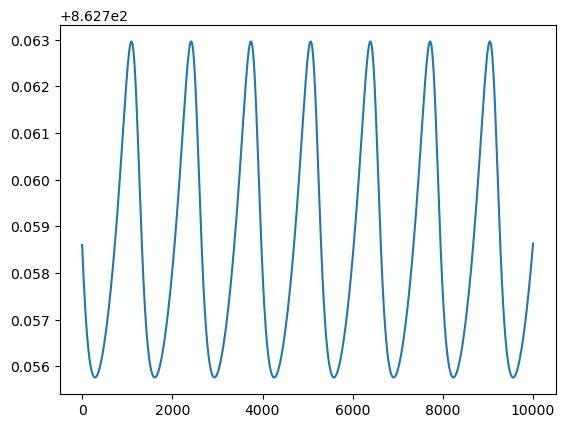

In [42]:
#Part a: 
fig, ax = plt.subplots()

plt.plot(t, vy1t[:,1])
plt.show()

#based on this plot, we would be able to detect the velocity of the sun
#from earths gravitational pull

#part b: 

def plot_sunv(name): #takes one parameter, the name of each planet as written in the "out" array
    m = m = out[name]['mass']
    mp = [m,msun]
    mp = np.array(mp)
    xp, yp, zp = out[name]['x'], out[name]['y'], out[name]['z']
    xs, ys, zs, = out['Sun']['x'], out['Sun']['y'], out['Sun']['z']
    x = [[xp, xs],[yp, ys],[zp, zs]]
    x = np.array(x)
    vxp, vyp, vzp = out[name]['vx'], out[name]['vy'], out[name]['vz']
    vxs, vys, vzs = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz']
    v = [[vxp, vxs],[vyp, vys],[vzp, vzs]]
    v = np.array(v)
    r = (xp**2+yp**2+zp**2)**(1/2)
    tend = (10 * 2 * 3.14 * r**(3/2))/((G*(m+msun))**(1/2))
    dt = tend/10000
    nsteps = 10000
    x4t, y4t, z4t, vx4t, vy4t, vz4t, t = nbody_integrate(x, v, mp, dt, nsteps)
    return x4t, y4t, z4t, vx4t, vy4t, vz4t, t

names = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
for i in range(1, len(names)):
    name = names[i]
    x4t, y4t, z4t, vx4t, vy4t, vz4t, t = plot_sunv(name)
    plt.plot(vy4t[:,1])
    plt.show()
    
#all the planets produce detectable results, except for pluto, which does not.

    
#Part c: map of all the planets except pluto 


mp8 = np.zeros(9)
x8 = np.zeros(shape=(3,9))
v8 = np.zeros(shape=(3,9))

for i in range(0, 9):
    name = names[i]
    m = out[name]['mass']
    mp8[i] += m
    x, y, z = out[name]['x'], out[name]['y'], out[name]['z']
    vx, vy, vz = out[name]['vx'], out[name]['vy'], out[name]['vz']
    x8[0,i] += x
    x8[1,i] += y
    x8[2,i] += z
    v8[0,i] += vx
    v8[1,i] += vy
    v8[2,i] += vz








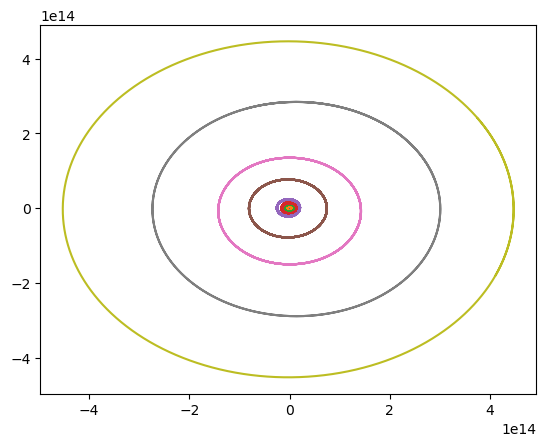

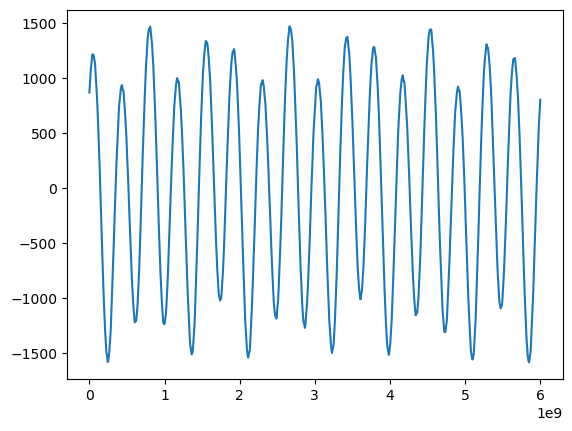

In [43]:
#This cell takes a while to load just for the information of the grader :)

x5t, y5t, z5t, vx5t, vy5t, vz5t, t5 = nbody_integrate(x8, v8, mp8, 600000, 10000)


plt.plot(x5t[:,0], y5t[:,0])
plt.plot(x5t[:,1], y5t[:,1])
plt.plot(x5t[:,2], y5t[:,2])
plt.plot(x5t[:,3], y5t[:,3])
plt.plot(x5t[:,4], y5t[:,4])
plt.plot(x5t[:,5], y5t[:,5])
plt.plot(x5t[:,6], y5t[:,6])
plt.plot(x5t[:,7], y5t[:,7])
plt.plot(x5t[:,8], y5t[:,8])
plt.show()

#now plotting the suns velocity: 

plt.plot(t5, vy5t[:,0])


#The velocity of bthe sun varies more, as expected, but still changes in periods

### <font color='blue'>5. (8 points)  Integrating orbits of planets in the <a href="http://www.openexoplanetcatalogue.com/planet/Gliese%20876%20e/">exoplanet system GJ 876</a></font>

#### Background info:
GJ876 is a red dwarf star for which a series of precise radial motion measurements exists. Modelling of these motions indicates that it has at least two planets (quite likely three) orbiting around it. The two planets have periods of $\approx 60$ and $\approx 30$ days and are locked in a 2:1 mean motion resonance. 
Cartesian coordinates, velocities, and masses of the stars for one of the best fitting models are presented in Table 3 of <a href="http://adsabs.harvard.edu/abs/2005ApJ...622.1182L">Laughlin et al. 2005</a> and are available in this <a href="https://github.com/a-kravtsov/a330f17/blob/master/data/gj876.dat">file.</a> The code snippet below reads it in cgs units. 
    
#### Tasks: 


**5a. (7 points).** Initialize the three body system (star and two planets) with these coordinates and velocities as initial conditions using data read in the code snippet below. Integrate them forward for 3320 days with the $N$-body code you implemented in the exercise 1. 

Record positions and velocities of the planets and the star. Make a scatter plot of $x$ and $y$ coordinates (converted to the astronomical unit AU) of the star and planets in half-day intervals. Plot the $y$-component of velocity of the star (in meters/sec) as a function of time. Repeat the calculation with different step sizes $\Delta t$ and make sure that you use step size value for which results do not change if step sizes was larger or smaller. 

Compare to Figures 1 and 2 in <a href="https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract">Laughlin et al. 2005</a> reproduced below. Correct calculation should reproduce the main features you can see in the figures (without the straight lines in the first figure and without  measurement points in the second figure, of course). Make sure you set the point size sufficiently small when making the scatter plot to compare to the First figure. 

**5b. (1 points).** repeat the calculation with the 1st order Euler scheme for the same step size and make the same plots as in 3a. Discuss whether the plots in this case agree with the figures in Laughlin et al. (2005). 

In [44]:
def read_g876():
    """
    reading initial positions of Gliese 876 and its planets b and c from Table 3 of Laughlin et al. 2005

    Returns: 
        mp in g, xp, yp, zp in cm, vxp, vyp, vzp is in cm/s 
    """
    
    data_file = 'https://astro.uchicago.edu/~andrey/classes/a211/data/gj876.dat'
    name = np.loadtxt(data_file, usecols=[0], unpack=True, dtype=str)
    mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_file, usecols=(1,2,3,4,5,6,7), unpack=True)
    return name, mp, xp, yp, zp, vxp, vyp, vzp 

In [45]:
name, mp1, xp, yp, zp, vxp, vyp, vzp = read_g876()

print(name, mp1, xp, yp, zp, vxp, vyp, vzp)



['Star' 'Planetc' 'Planetb'] [6.36515181e+32 1.13341374e+30 3.59700414e+30] [ 0.00000000e+00 -1.37393700e+12  2.89833447e+12] [ 0.0000000e+00  6.6185776e+11 -1.3485766e+12] [0. 0. 0.] [   -3974.15664 -2532174.78     1501141.65   ] [   -9012.47643 -5262209.95     3252940.14   ] [0. 0. 0.]


Figures from Laughlin et al. 2005 paper that we aim to reproduce (approximately) in this exercise. 

<center>
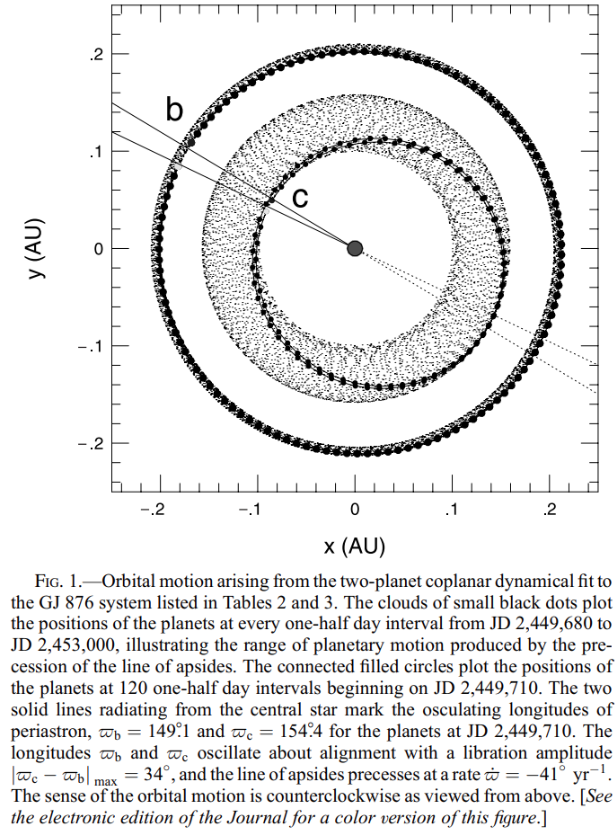</img>
</center>



<center>
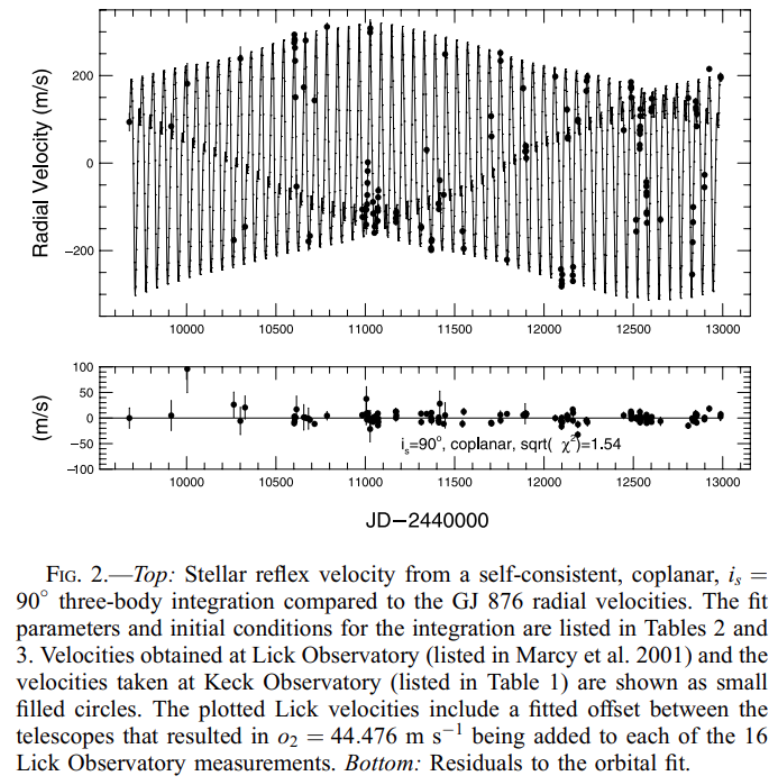</img>
</center>

### your solution: 

411068273769982.94
-2632089.2311372864


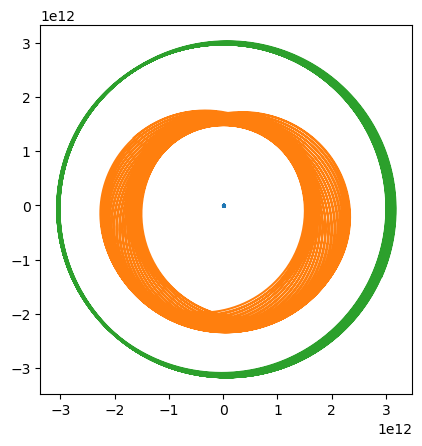

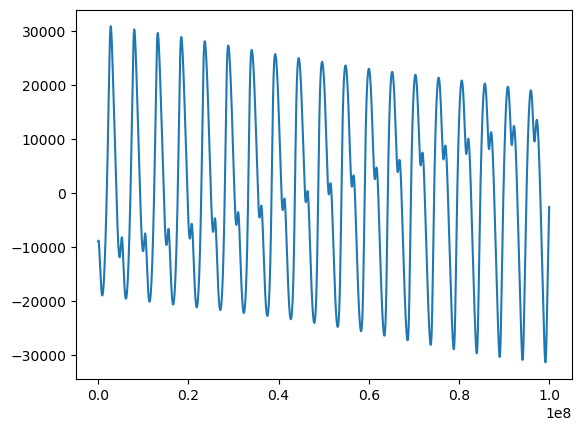

In [46]:
fig, ax = plt.subplots()
#mp is already defined
# now me must define x y z as 3xN arrays, with N=3

x1 = np.array([[0.0, -1.373937*10**12, 2.8983344*10**12], 
      [0.0, 6.6185776*10**11, -1.3485766*10**12], 
             [0.0, 0.0, 0.0]])

print(x)
v1 = np.array([[-3974.15664, -2532174.78, 1501141.65], 
      [-9012.47643, -5262209.95, 3252940.14], 
             [0.0, 0.0, 0.0]])

print(v[0,0])

x1t, y1t, z1t, vx1t, vy1t, vz1t, t = nbody_integrate(x1, v1, mp1, 10000, 10000)

plt.plot(x1t[:,0], y1t[:,0])
plt.plot(x1t[:,1], y1t[:,1])
plt.plot(x1t[:,2], y1t[:,2])
ax.set_aspect('equal')
plt.show()
#the graph mirrors the planets orbits we see above pretty well, 
#with a wider range of orbits for the inner planet than the outer planets
#as we expect based on the picture above

#now we just need to graph the suns velocity with respect to time

plt.plot(t, vy1t[:,0])

#this plot also mirrors the picture we see above in respect to its key featurs
#both have spikes that have a small little zigzag somehwere in the middle of each spike. 

In [47]:
#first order euler: simply switch the order of steps in nbod integrate
def nbody_integrate_euler(x, v, mp, dt=None, nsteps = None, acc_fun=None): 
    '''This function takes in 3xN arrays x and v, and 1xN array mp
    and outputs 6 nsteps by N arrays correesponding to the position and 
    velocity of each particle over time'''
    dt = 100000
    nsteps = 10000
    x1t = np.zeros(shape=(nsteps, len(mp)))
    y1t = np.zeros(shape=(nsteps, len(mp)))
    z1t = np.zeros(shape=(nsteps, len(mp)))
    vx1t = np.zeros(shape=(nsteps, len(mp)))
    vy1t = np.zeros(shape=(nsteps, len(mp)))
    vz1t = np.zeros(shape=(nsteps, len(mp)))
    for i in range(0, nsteps):
        for j in range(0, len(mp)):
                ax1, ay1, az1 = acc_nbody(x, mp)
                x[0,j] += v[0, j] *dt
                x[1,j] += v[1, j] *dt
                x[2,j] += v[2, j] *dt
                v[0,j] += ax1[j] *dt
                v[1,j] += ay1[j] *dt
                v[2,j] += az1[j] *dt
                x1t[i,j] += x[0, j] 
                y1t[i,j] += x[1, j]
                z1t[i,j] += x[2, j]
                vx1t[i,j] += v[0, j]
                vy1t[i,j] += v[1, j]
                vz1t[i,j] += v[2, j]
    return x1t, y1t, z1t, vx1t, vy1t, vz1t

[-2.43785607e+10 -2.42861853e+10 -2.38681440e+10 ...  2.99760870e+11
  2.99513457e+11  2.99266019e+11]


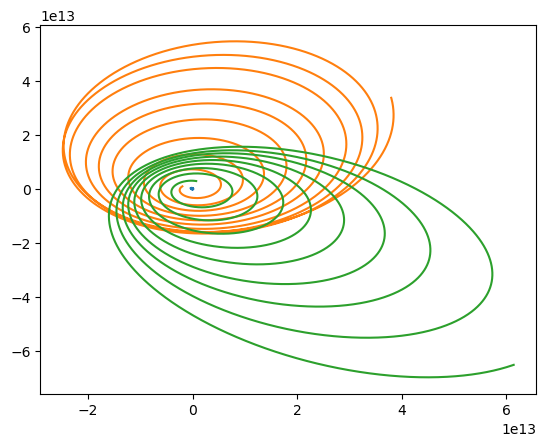

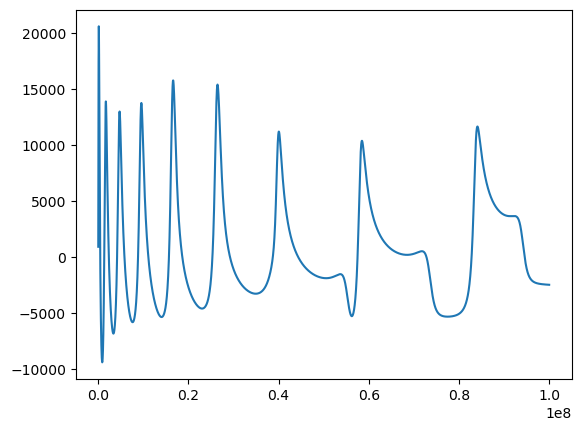

In [48]:
x2t, y2t, z2t, vx2t, vy2t, vz2t = nbody_integrate_euler(x1, v1, mp1)

print(y2t[:,0])
plt.plot(x2t[:,0], y2t[:,0])
plt.plot(x2t[:,1], y2t[:,1])
plt.plot(x2t[:,2], y2t[:,2])
plt.show()

t = np.arange(10000)
t = t*10000

plt.plot(t, vy2t[:,0])

#The plots no longer make any sense when we preform the first order euler scheme 
#and the planets quickly spiral out of control, showing how 
#the kick drift scheme is better for computing orbits 
#over long periods of time